In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

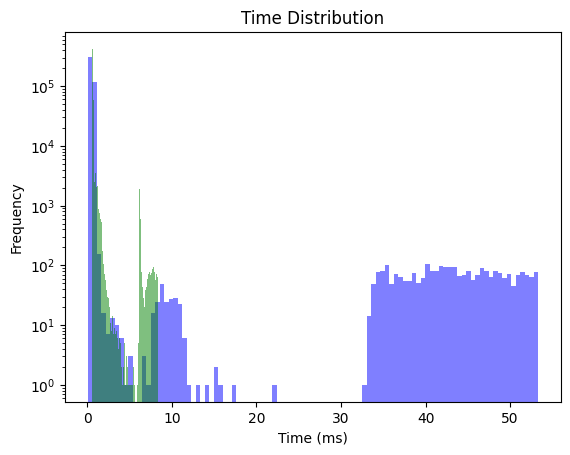

In [2]:
jl_df = pd.read_csv('data/jl_time.csv')
jl_df['time'] = jl_df['time'][jl_df['time'] < np.percentile(jl_df['time'], 99)]

py_df = pd.read_csv('data/py_time.csv')
py_df['time'] = py_df['time'][py_df['time'] < np.percentile(py_df['time'], 99)]

cpp_df = pd.read_csv('data/cpp_time.csv')
cpp_df['time'] = cpp_df['time'][cpp_df['time'] < np.percentile(cpp_df['time'], 99)]


plt.hist(jl_df['time'], bins=100, log=True, alpha=0.5, color='red')
plt.hist(py_df['time'], bins=100, log=True, alpha=0.5, color='blue')
plt.hist(cpp_df['time'], bins=100, log=True, alpha=0.5, color='green')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')
plt.title('Time Distribution')
plt.show()

Text(0, 0.5, 'Frequency')

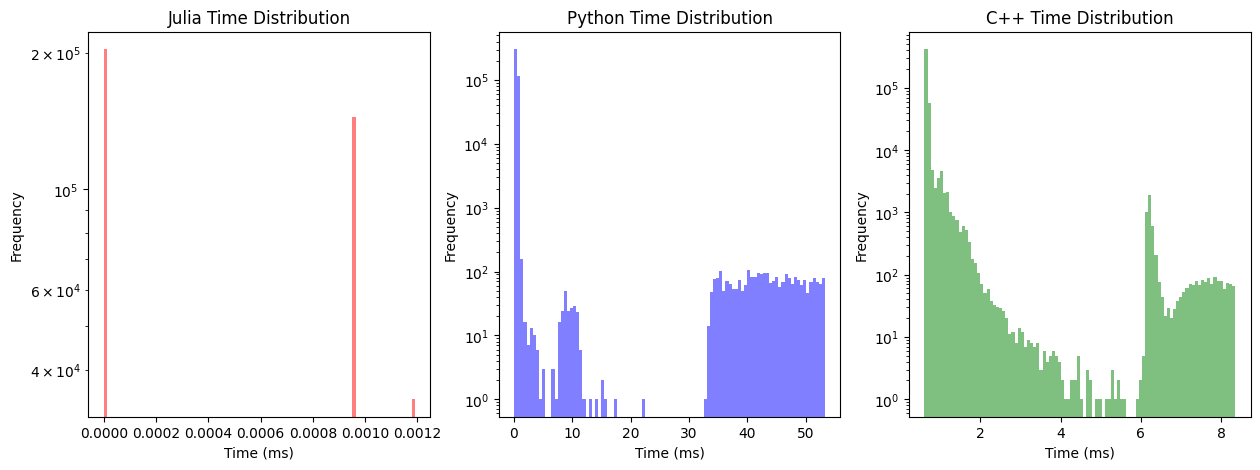

In [5]:
# 3x1 subplot of 3 different times 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(jl_df['time'], bins=100, log=True, alpha=0.5, color='red')
ax[0].set_title('Julia Time Distribution')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Frequency')

ax[1].hist(py_df['time'], bins=100, log=True, alpha=0.5, color='blue')
ax[1].set_title('Python Time Distribution')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Frequency')

ax[2].hist(cpp_df['time'], bins=100, log=True, alpha=0.5, color='green')
ax[2].set_title('C++ Time Distribution')
ax[2].set_xlabel('Time (ms)')
ax[2].set_ylabel('Frequency')